# Pré processamento

In [1]:
# Importando as bibliotecas e construindo o dataframe
import pandas as pd

In [53]:
# concatenando dois dataframes (um com fake news e outro com noticias verdadeiras)
fake_df = pd.read_csv('https://raw.githubusercontent.com/guilopesrbc/fake_news_detector/main/Fake.csv')
true_df = pd.read_csv('https://raw.githubusercontent.com/guilopesrbc/fake_news_detector/main/True.csv')
# adicionando coluna label, correspondente a veracidade da noticias (1 para verdadeiro e 0 para falsa)
fake_df['label'] = 0
true_df['label'] = 1

combined_df = pd.concat([fake_df, true_df], ignore_index=True)

combined_df.to_csv('Combined.csv', index=False)
combined_df.reset_index(drop=True,inplace=True)

In [54]:
combined_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [55]:
# criando coluna num_of_words correspondente ao número de palavras presentes no texto da noticia
# combined_df['vector'] = pd.Series(dtype="object")
import re
# regex para substituir caracteres que não forem letras e números
regex = r'[^a-zA-Z0-9\s]'
combined_df['text'] = combined_df['text'].map(lambda x: re.sub(regex, '', x))
combined_df['num_of_words'] = combined_df['text'].map(lambda x: len(x.split()))
combined_df.head()

,title,text,subject,date,label,num_of_words
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,492
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,305
2,Sheriff David Clarke Becomes An Internet Joke...,On Friday it was revealed that former Milwauke...,News,"December 30, 2017",0,579
3,Trump Is So Obsessed He Even Has Obama’s Name...,On Christmas day Donald Trump announced that h...,News,"December 29, 2017",0,441
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,420


# Setando campos como categóricos

In [56]:
combined_df.dtypes

title           object
text            object
subject         object
date            object
label            int64
num_of_words     int64
dtype: object

In [57]:
combined_df['subject'] = combined_df['subject'].astype('category')

In [58]:
combined_df.dtypes

title             object
text              object
subject         category
date              object
label              int64
num_of_words       int64
dtype: object

In [61]:
combined_df['subject'] = combined_df['subject'].cat.codes

In [62]:
combined_df['subject'].unique()

array([2, 5, 0, 4, 3, 1, 6, 7], dtype=int8)

In [63]:
combined_df.dtypes

title           object
text            object
subject           int8
date            object
label            int64
num_of_words     int64
dtype: object

# Verificando valores nulos e vazios

In [11]:
# verificando valores nulo
combined_df.isnull().sum()

title           0
text            0
subject         0
date            0
label           0
num_of_words    0
dtype: int64

In [12]:
# verificando valores vazios de titulo
remove_spaces = lambda x: ''.join(x.split()) if type(x) == str else x
empty_values = combined_df.map(remove_spaces)
empty_values['title'] = empty_values['title'] == ''
len(empty_values[empty_values['title'] == True])

0

In [13]:
# verificando valores vazios de texto
remove_spaces = lambda x: ''.join(x.split()) if type(x) == str else x
empty_values = combined_df.map(remove_spaces)
empty_values['text'] = empty_values['text'] == ''
len(empty_values[empty_values['text'] == True])

631

In [14]:
# verificando valores vazios de tipo de conteúdo
remove_spaces = lambda x: ''.join(x.split()) if type(x) == str else x
empty_values = combined_df.map(remove_spaces)
empty_values['subject'] = empty_values['subject'] == ''
len(empty_values[empty_values['subject'] == True])

0

# Normalização

In [69]:
df = combined_df[['subject', 'label', 'num_of_words']]
df.head()

,subject,label,num_of_words
0,2,0,492
1,2,0,305
2,2,0,579
3,2,0,441
4,2,0,420


In [86]:
# nomarlizando entre 0 e 1 min-max usando scikit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df['subject_norm'] = scaler.fit_transform(df[['subject']])
df['num_of_words_norm'] = scaler.fit_transform(df[['num_of_words']])
df.head()

C:\Users\guiL6\AppData\Local\Temp\ipykernel_8432\2331820638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subject_norm'] = scaler.fit_transform(df[['subject']])


,subject,label,num_of_words,subject_norm,num_of_word_norm,num_of_words_norm
0,2,0,492,0.285714,0.060576,0.060576
1,2,0,305,0.285714,0.037552,0.037552
2,2,0,579,0.285714,0.071288,0.071288
3,2,0,441,0.285714,0.054297,0.054297
4,2,0,420,0.285714,0.051711,0.051711


In [87]:
df['subject_norm'].describe()

count    44898.000000
mean         0.674274
std          0.293159
min          0.000000
25%          0.285714
50%          0.714286
75%          0.857143
max          1.000000
Name: subject_norm, dtype: float64

In [88]:
df['num_of_words_norm'].describe()

count    44898.000000
mean         0.049741
std          0.043165
min          0.000000
25%          0.024871
50%          0.044447
75%          0.062916
max          1.000000
Name: num_of_words_norm, dtype: float64

# Discretização

# Teste de hipotese

<Axes: >

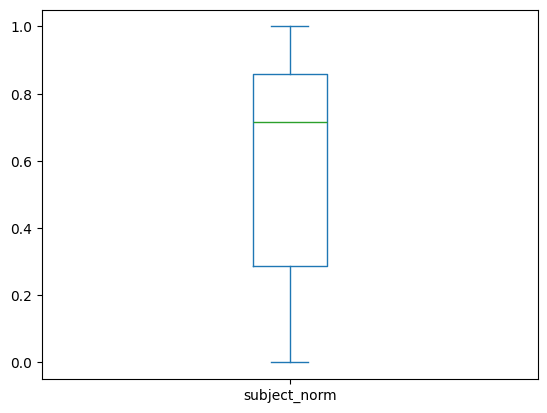

In [89]:
import matplotlib.pyplot as plt
df['subject_norm'].plot(kind='box')

<Axes: ylabel='Frequency'>

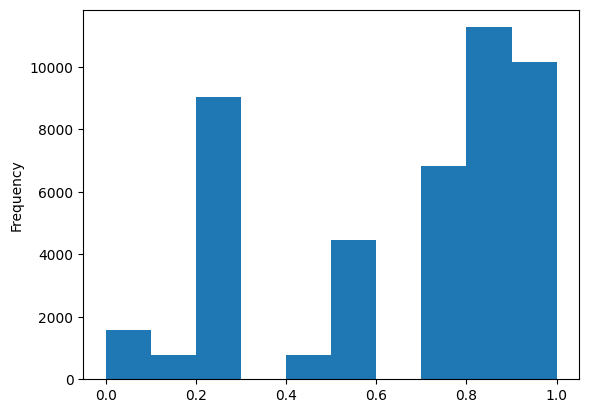

In [91]:
df['subject_norm'].plot(kind='hist')

<Axes: >

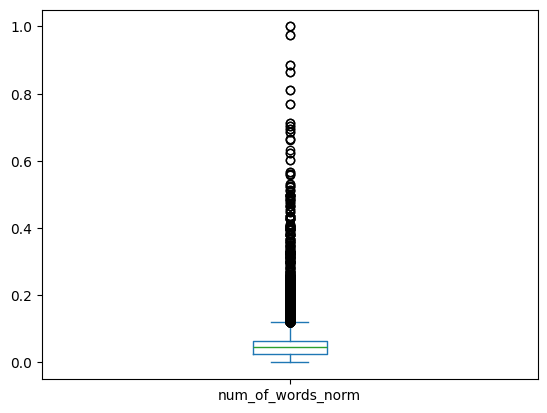

In [92]:
df['num_of_words_norm'].plot(kind='box')

<Axes: ylabel='Frequency'>

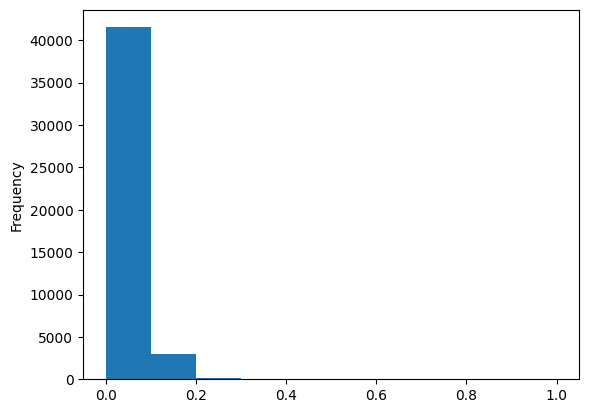

In [95]:
df['num_of_words_norm'].plot(kind='hist')

<Axes: >

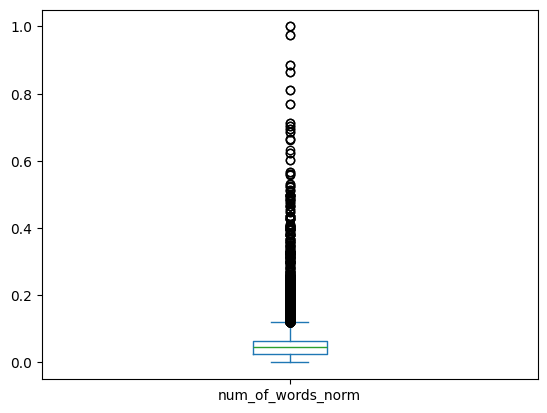

In [99]:
import numpy as np
df['num_of_words_norm'].plot(kind='box')

<Axes: ylabel='Frequency'>

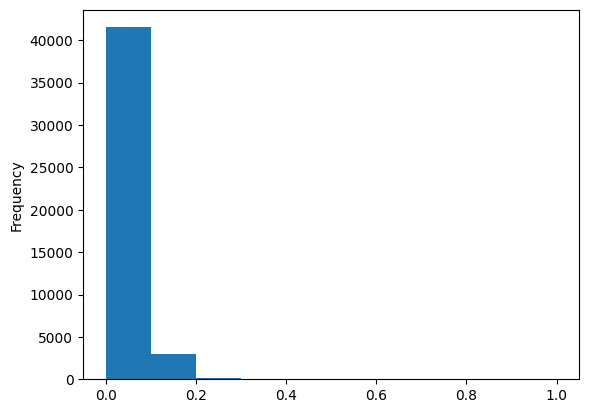

In [101]:
df['num_of_words_norm'].plot(kind='hist')